In [122]:
import numpy as np
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from train_embeddings import get_documents_for_doc2vec
from Corpora import MovieReviewCorpus

In [154]:
# Use LaTEX font
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Palatino'], 'size': 14})

In [123]:
corpus=MovieReviewCorpus(stemming=False,pos=False,to_lower=True)

In [6]:
doc2vec_model = pickle.load(open(f"models_d2v/w_dbow_064.p","rb"))

In [158]:
documents = [review for sent, review in corpus.reviews]

In [124]:
all_docs = get_documents_for_doc2vec()

In [140]:
shortest_doc_index = np.argsort(np.array([len(d[0]) for d in all_docs]))[1]
shortest_doc = all_docs[shortest_doc_index][0]
print(f"The shortest document looks like:\n{shortest_doc}")

The shortest document looks like:
['i', 'hope', 'this', 'group', 'of', 'film-makers', 'never', 're-unites', '.']


In [180]:
shortest_doc_index = np.argsort(np.array([len(d) for d in documents]))[0]
shortest_doc = documents[shortest_doc_index]
shortest_doc = [word if word != "'m" else "im" for word in shortest_doc]
shortest_doc.remove("i")
print(f"The shortest document looks like:\n{shortest_doc}")

The shortest document looks like:
['this', 'film', 'is', 'extraordinarily', 'horrendous', 'and', 'im', 'not', 'going', 'to', 'waste', 'any', 'more', 'words', 'on', 'it', '.']


In [205]:
" ".join(shortest_doc)

'this film is extraordinarily horrendous and im not going to waste any more words on it .'

In [211]:
doc_1 = ['this', 'film', 'is', 'extraordinarily', 'horrendous', 'and', 'im', 'not', 'going', 'to', 'waste', 'any', 'more', 'words', 'on', 'it', '.']
doc_2 = ['i', 'hope', 'this', 'group', 'of', 'film-makers', 'never', 're-unites', '.']

In [257]:
def plot_embeddings(doc, rs, shift=10):
    doc_embedding = doc2vec_model.infer_vector(doc)

    word_embeddings = []
    for word in doc:
        word_embedding = doc2vec_model[word]
        word_embeddings.append(word_embedding)

    tsne = TSNE(random_state=rs, perplexity=5, n_iter=15000, metric="cosine")

    X = word_embeddings + [doc_embedding]
    low_dim_embeddings = tsne.fit_transform(X)

    labels = [word for word in doc] + ["doc2vec_embedding"]

    for i, (x, y) in enumerate(low_dim_embeddings):
        if labels[i] =="doc2vec_embedding":      
            plt.scatter(x,y, color='red', marker='x', s=60)
        else:
            plt.scatter(x,y, color='blue')
        plt.annotate(labels[i], xy=(x+shift,y))

/Users/shaneweisz/Documents/MLMI/NLP_MLMI13/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/shaneweisz/Documents/MLMI/NLP_MLMI13/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/shaneweisz/Documents/MLMI/NLP_MLMI13/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/Users/shaneweisz/Documents/MLMI/NLP_MLMI13/.venv/lib/python3.9/sit

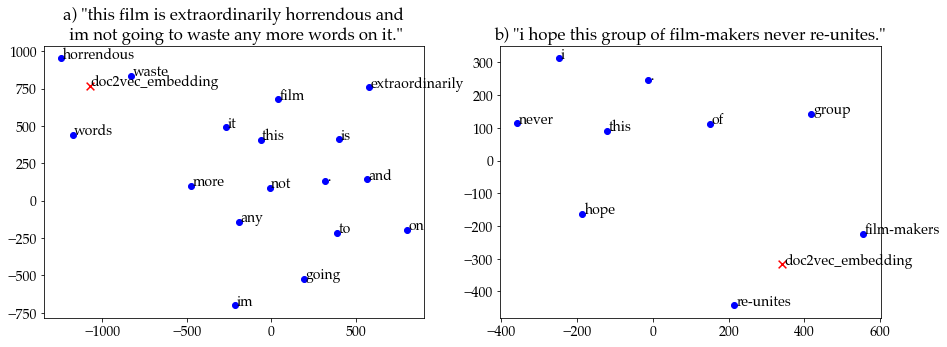

In [291]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.title('a) "this film is extraordinarily horrendous and\n im not going to waste any more words on it."');
plot_embeddings(doc_1, 7, shift=8) # 7 good
fig.add_subplot(1,2,2)
plot_embeddings(doc_2, 2, shift=5)
plt.title('b) "i hope this group of film-makers never re-unites."');